In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

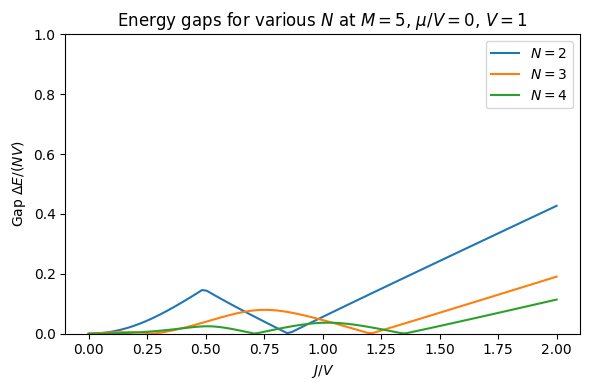

In [2]:
M = 5
J_V_ratios = np.linspace(0, 2, 100)
mu_V_ratio = 1
V = 1

for mu_V_ratio in [0]:
    fig, ax = plt.subplots(figsize=(6, 4))

    for N in range(2, 5): 
        gaps = []

        for J_V_ratio in J_V_ratios:
            hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio, J_V_ratio)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            gap = (eigenvalues[1] - eigenvalues[0]) / N
            gaps.append(gap)

        ax.plot(J_V_ratios, gaps, label=f"$N={N}$")

    ax.set_xlabel("$J/V$")
    ax.set_ylabel("Gap $\Delta E / (NV)$")
    ax.set_title(f"Energy gaps for various $N$ at $M={M}$, $\mu/V={mu_V_ratio}$, $V={V}$")
    ax.set_ylim(0,1)
    ax.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.animation as animation

M = 5
J_V_ratios = np.linspace(0, 2, 100)
V = 1
num_frames = 60  # Number of frames for animation
mu_V_values = np.linspace(0, 1, num_frames)  # Values of mu/V from 0 to 1

fig, ax = plt.subplots(figsize=(6, 4))

def update(frame):
    ax.cla()  # Clear the previous frame
    mu_V_ratio = mu_V_values[frame]  # Get the current mu/V value

    for N in range(2, 5): 
        gaps = []
        for J_V_ratio in J_V_ratios:
            hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio, J_V_ratio)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            gap = (eigenvalues[1] - eigenvalues[0]) / N
            gaps.append(gap)
        
        ax.plot(J_V_ratios, gaps, label=f"$N={N}$")

    ax.set_xlabel("$J/V$")
    ax.set_ylabel("Gap $\Delta E / (NV)$")
    ax.set_title(f"Energy gaps for various $N$ at $M={M}$, $\mu/V={mu_V_ratio:.2f}$, $V={V}$")
    ax.legend(loc = "lower right")
    ax.set_ylim(0,1)
    plt.tight_layout()

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=100)

# Save or show animation
plt.show()
ani.save('energy_gaps_animation.gif', writer='pillow', fps=20)


In [ ]:
import matplotlib.animation as animation

M = 5
J_V_ratios = np.linspace(0, 2, 250)
V = -1
num_frames = 100  # Number of frames for animation
mu_V_values = np.linspace(0, 1, num_frames)  # Values of mu/V from 0 to 1

fig, ax = plt.subplots(figsize=(6, 4))

def update(frame):
    ax.cla()  # Clear the previous frame
    mu_V_ratio = mu_V_values[frame]  # Get the current mu/V value

    for N in range(3,4): 
        gaps = []
        for J_V_ratio in J_V_ratios:
            hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio, J_V_ratio)
            eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
            gap = (eigenvalues[1] - eigenvalues[0]) / N
            gaps.append(gap)
        
        ax.plot(J_V_ratios, gaps, label=f"$N={N}$")

    ax.set_xlabel("$J/V$")
    ax.set_ylabel("Gap $\Delta E / (NV)$")
    ax.set_title(f"Energy gaps for various $N$ at $M={M}$, $\mu/V={mu_V_ratio:.2f}$, $V={V}$")
    ax.legend(loc = "lower right")
    ax.set_ylim(0,1)
    plt.tight_layout()

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=100)

# Save or show animation
plt.show()
ani.save('energy_gaps_animation.gif', writer='pillow', fps=20)
